In [309]:
# load data
from sklearn import datasets
boston = datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [310]:
# summary of data
feature = boston.data
price = boston.target
print('data size = ', feature.shape)
print('target size = ', price.shape)
print('feature attributes: ', boston.feature_names)
print(boston.DESCR)

data size =  (506, 13)
target size =  (506,)
feature attributes:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employme

In [311]:
# more details of data
import pandas as pd
df_feature = pd.DataFrame(feature, columns = boston.feature_names)
df_target = pd.DataFrame(price, columns =['MEDV'])
df_boston = pd.concat([df_feature, df_target,], axis = 1)

In [312]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [313]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Figure size 432x288 with 0 Axes>

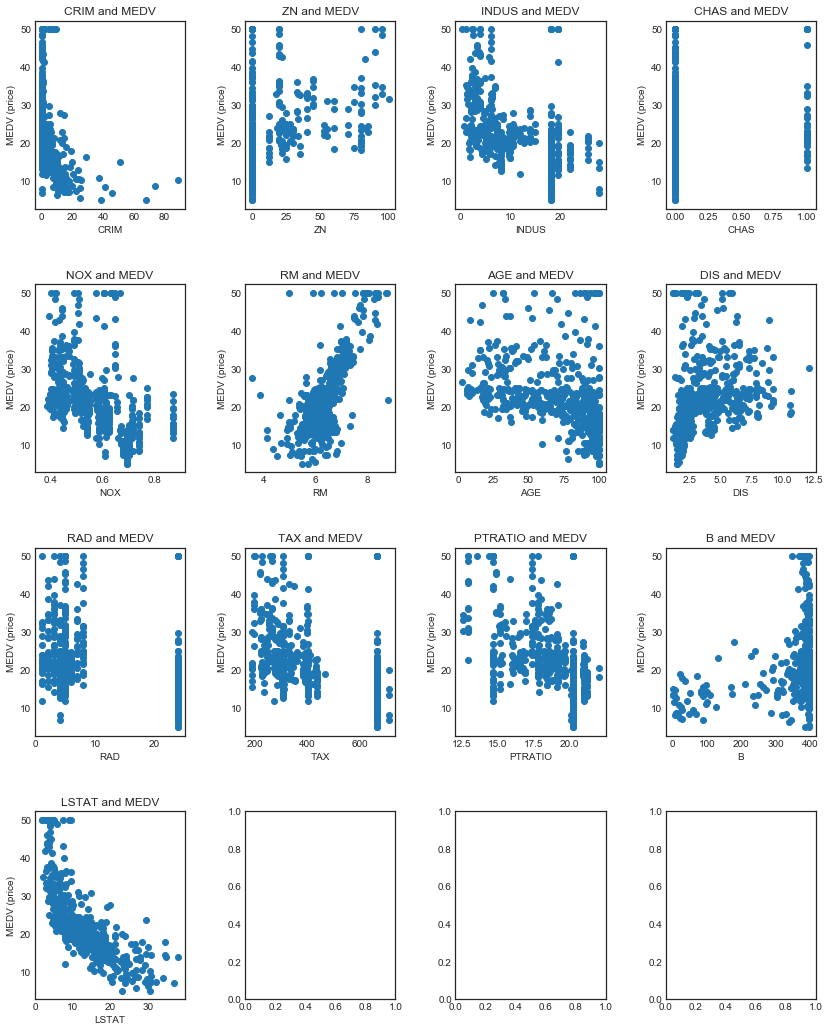

In [314]:
# 2.1 how does each feature relate to the price
import matplotlib.pyplot as plt
plt.figure()
fig,axes = plt.subplots(4, 4, figsize=(14,18))
fig.subplots_adjust(wspace=.4, hspace=.4)
img_index = 0
for i in range(boston.feature_names.size):
    row, col = i // 4, i % 4
    axes[row][col].scatter(feature[:,i], price)
    axes[row][col].set_title(boston.feature_names[i] + ' and MEDV')
    axes[row][col].set_xlabel(boston.feature_names[i])        
    axes[row][col].set_ylabel('MEDV (price)')
plt.show()

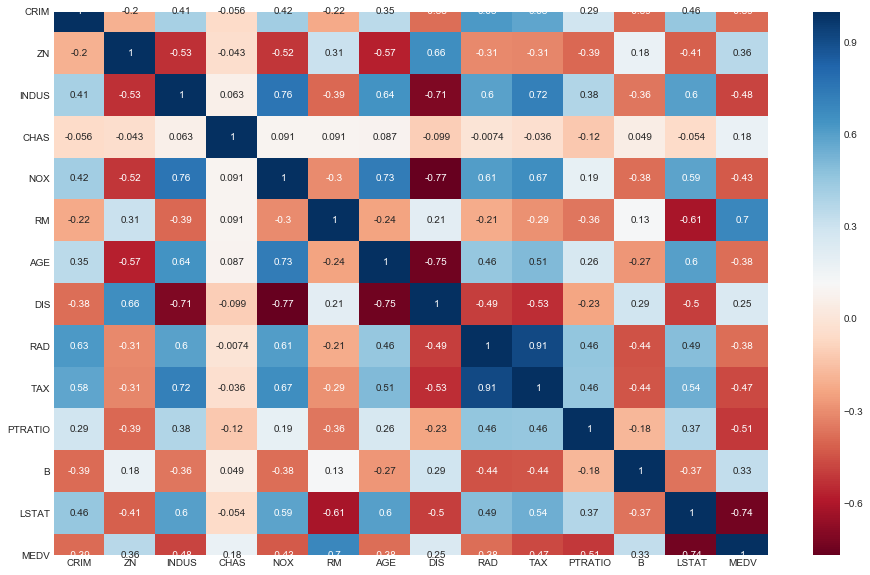

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [315]:
# 2.2 correlation matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(16, 10))
correlation = df_boston.corr()
sns.heatmap(correlation, annot = True, cmap = 'RdBu')
plt.show()
print (correlation)

In [316]:
correlation.MEDV

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [317]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.3, random_state=8)

In [318]:
print (X_train.shape)
# need to add another column of ones (feature) to X_train
print (y_train.shape)

(354, 13)
(354,)


In [319]:
# 2.3 linear regression and ridge regression
import numpy as np

def least_square(X, y):
    #TODO
    bias_col = np.ones((X.shape[0], 1))
    # added another column of ones to X to take care of bias
    X_new = np.hstack((X, bias_col))
    theta = np.linalg.inv((X_new.T).dot(X_new)).dot(X_new.T).dot(y)
    return theta

def ridge_reg(X, y, eta):
    #TODO
    bias_col = np.ones((X.shape[0], 1))
    # added another column of ones to X to take care of bias
    X_new = np.hstack((X, bias_col))
    num_features = X_new.shape[1]
    theta = np.linalg.inv((X_new.T).dot(X_new) + (eta/2)*np.identity(num_features)).dot(X_new.T).dot(y)
    return theta

# apply linear regression
theta = least_square(X_train, y_train)
df_theta = pd.DataFrame(zip(boston.feature_names, theta),columns=['Feature','Coeff'])
print (df_theta)
print("Intercept=", theta[-1])

# apply ridge regression
theta_r = ridge_reg(X_train, y_train, 15.0)
df_theta_r = pd.DataFrame(zip(boston.feature_names, theta_r),columns=['Feature','Coeff'])
print (df_theta_r)
print("Intercept=", theta_r[-1])

    Feature      Coeff
0      CRIM  -0.108934
1        ZN   0.053133
2     INDUS   0.023440
3      CHAS   2.488903
4       NOX -12.228308
5        RM   3.880905
6       AGE  -0.008650
7       DIS  -1.392799
8       RAD   0.272090
9       TAX  -0.011167
10  PTRATIO  -0.934401
11        B   0.010577
12    LSTAT  -0.559851
Intercept= 32.75619254728416
    Feature     Coeff
0      CRIM -0.100979
1        ZN  0.054729
2     INDUS  0.009770
3      CHAS  2.219564
4       NOX  0.264179
5        RM  5.522153
6       AGE -0.010481
7       DIS -0.930319
8       RAD  0.172062
9       TAX -0.009316
10  PTRATIO -0.451220
11        B  0.015037
12    LSTAT -0.495838
Intercept= 2.8060488765811775


In [320]:
# 2.4 evaluation
def pred_fn(X, theta):
    #TODO
    bias_col = np.ones((X.shape[0], 1))
    # added another column of ones to X to take care of bias
    X_new = np.hstack((X, bias_col))
    pred = X_new.dot(theta)
    return pred

def root_mean_square_error(pred, y):
    #TODO
    n = y.shape[0]
    rmse = np.sqrt(np.sum(np.square(y - pred))/n)
    return rmse

## Linear regression
pred_y_train = pred_fn(X_train, theta)
pred_y_test = pred_fn(X_test, theta)

rmse_train = root_mean_square_error(pred_y_train, y_train)
rmse_test = root_mean_square_error(pred_y_test, y_test)
print ("Linear Regression \n-----------------------------------------------")
print ("Training RMSE = %.4f, Test RMSE = %.4f \n"%(rmse_train, rmse_test))


## Ridge regression
pred_y_train = pred_fn(X_train, theta_r)
pred_y_test = pred_fn(X_test, theta_r)

rmse_train = root_mean_square_error(pred_y_train, y_train)
rmse_test = root_mean_square_error(pred_y_test, y_test)
print ("Ridge Regression \n-----------------------------------------------")
print ("Training RMSE = %.4f, Test RMSE = %.4f"%(rmse_train, rmse_test))


Linear Regression 
-----------------------------------------------
Training RMSE = 4.6314, Test RMSE = 4.8699 

Ridge Regression 
-----------------------------------------------
Training RMSE = 4.7954, Test RMSE = 5.1603


Text(0, 0.5, 'RMSE')

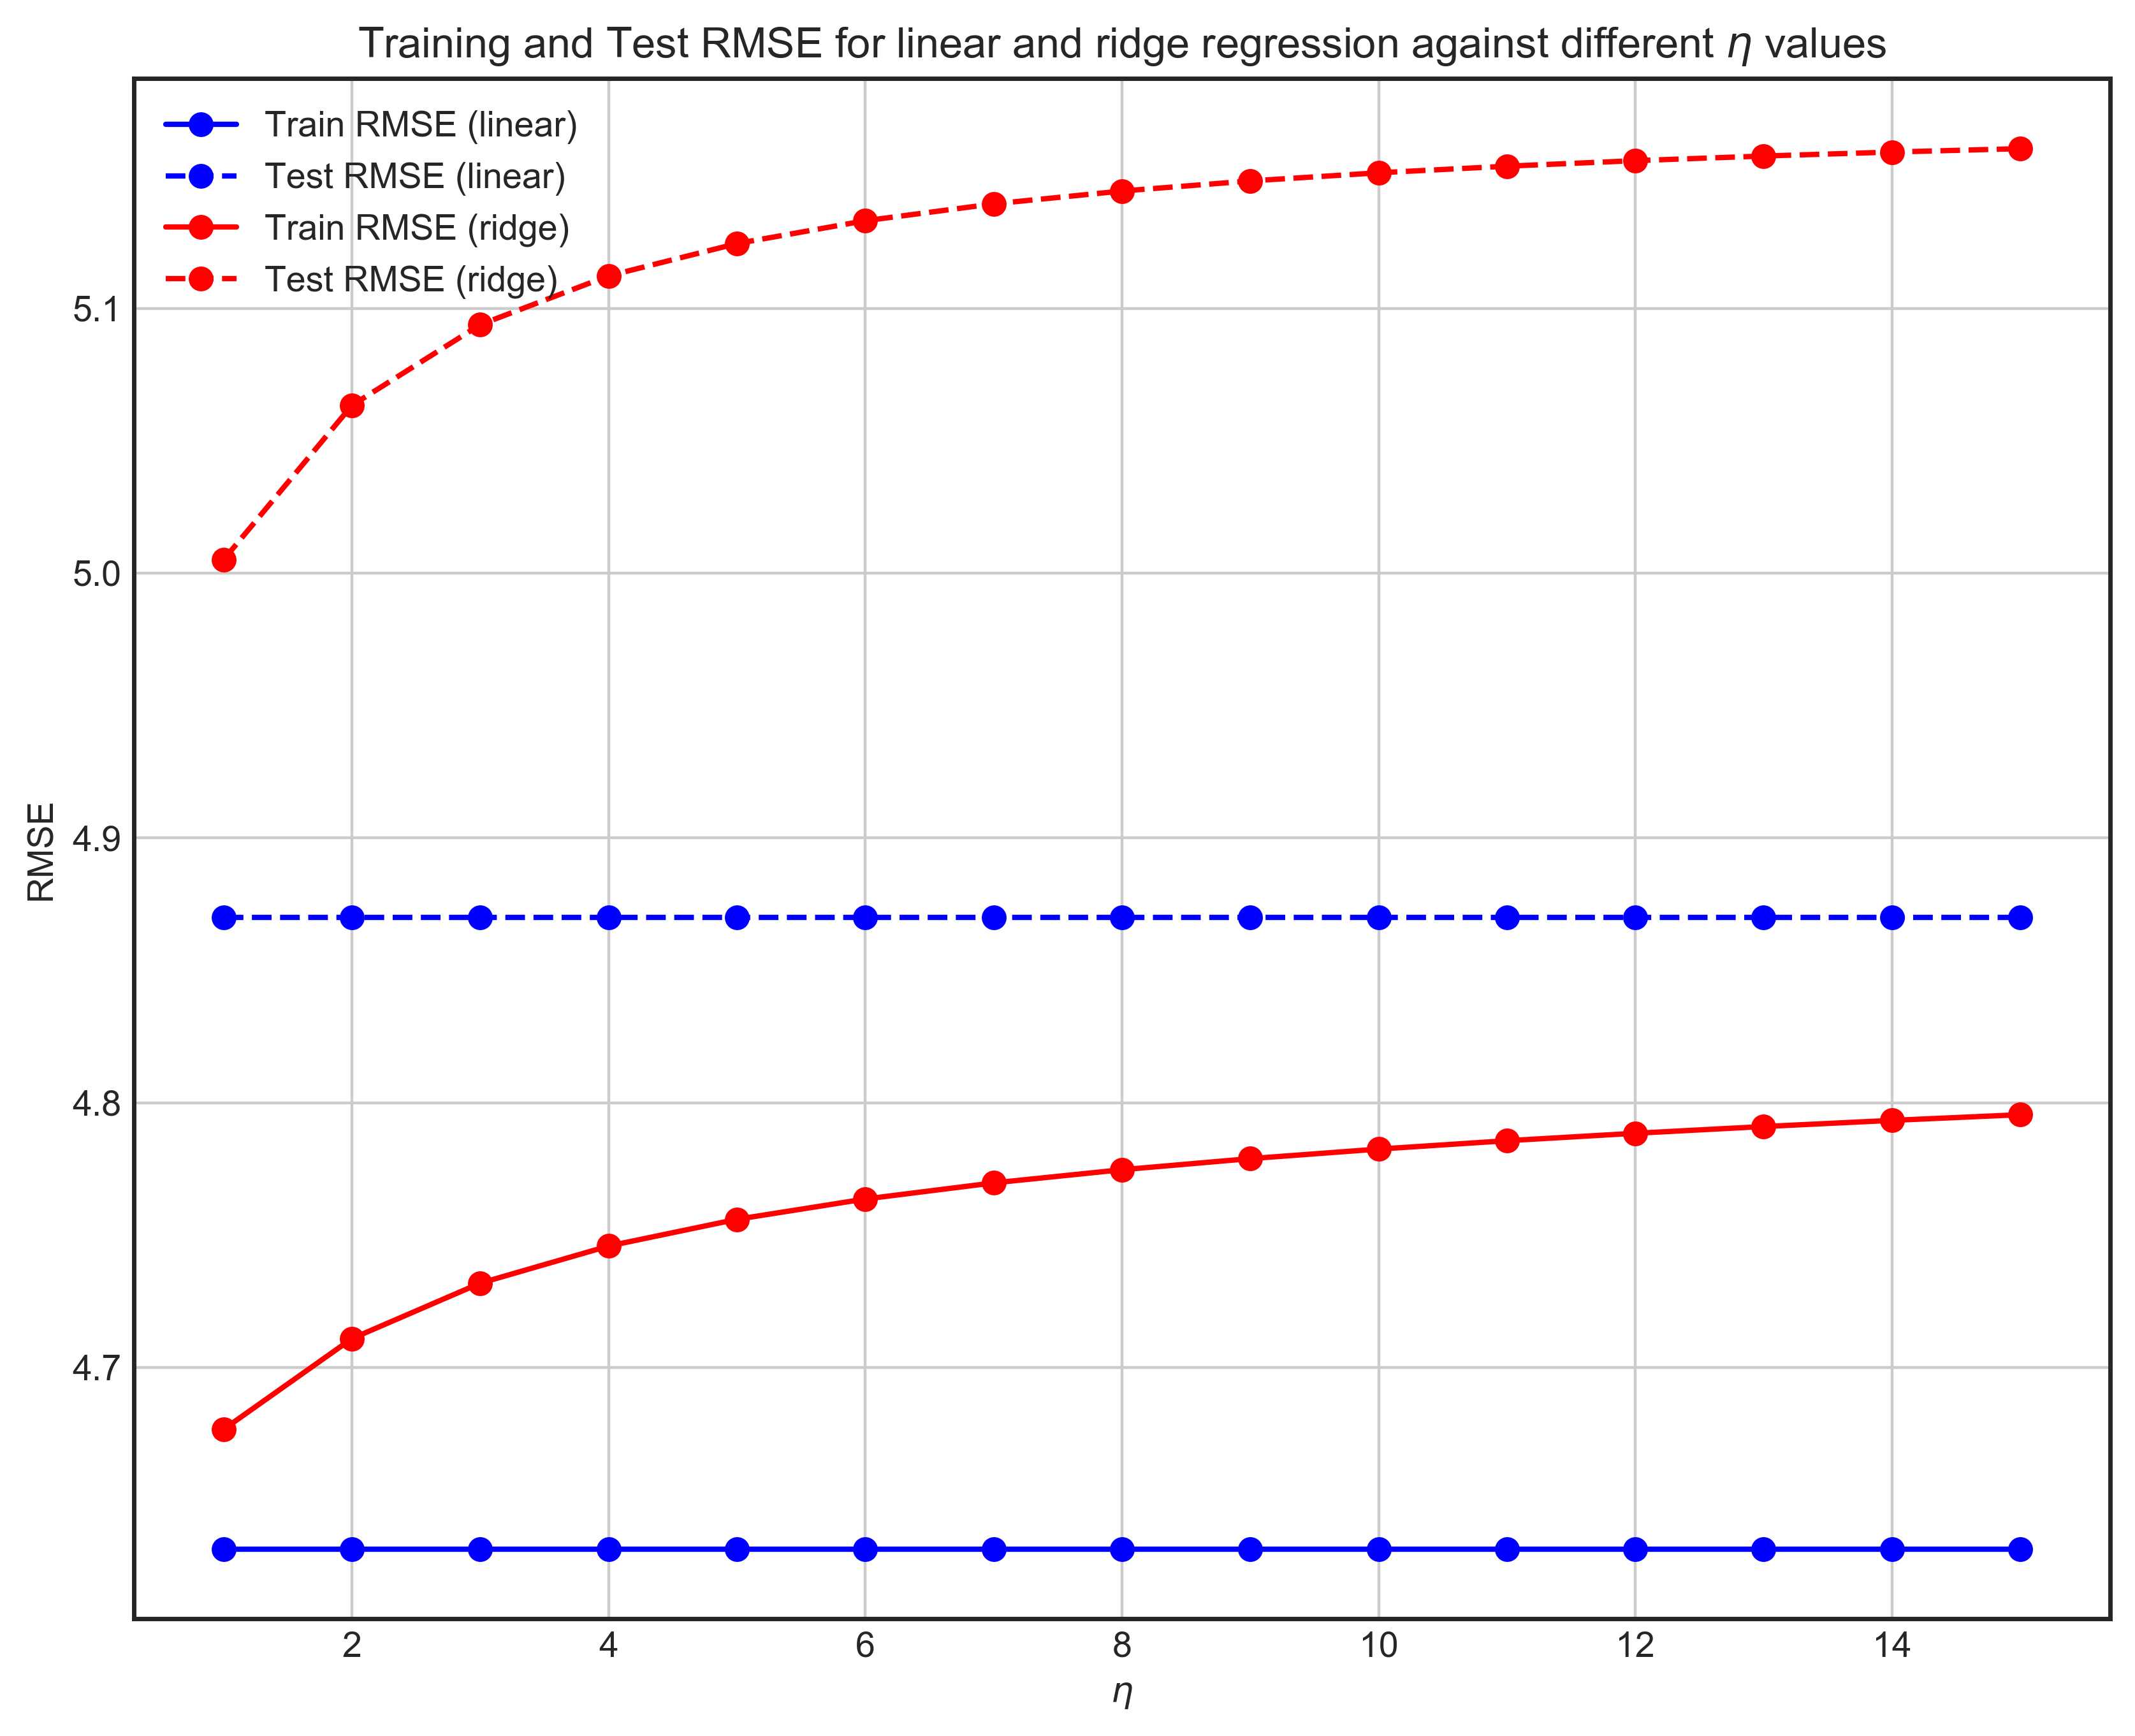

In [321]:
## trying different values of eta
etas = [i for i in range(1,16,1)]

rmse_train_linear = []
rmse_test_linear = []
rmse_train_ridge = []
rmse_test_ridge = []

for eta in etas:
    theta = least_square(X_train, y_train)
    theta_r = ridge_reg(X_train, y_train, eta)
    pred_y_train_lin = pred_fn(X_train, theta)
    pred_y_test_lin = pred_fn(X_test, theta)
    rmse_train_linear.append(root_mean_square_error(pred_y_train_lin, y_train))
    rmse_test_linear.append(root_mean_square_error(pred_y_test_lin, y_test))

    pred_y_train_r = pred_fn(X_train, theta_r)
    pred_y_test_r = pred_fn(X_test, theta_r)
    rmse_train_ridge.append(root_mean_square_error(pred_y_train_r, y_train))
    rmse_test_ridge.append(root_mean_square_error(pred_y_test_r, y_test))
    
fig, ax = plt.subplots(figsize=(10, 8), dpi=400)
plt.plot(etas, rmse_train_linear, '-o', c = 'blue', ls = '-', label = 'Train RMSE (linear)')
plt.plot(etas, rmse_test_linear, '-o', c = 'blue', ls = '--', label = 'Test RMSE (linear)')
plt.plot(etas, rmse_train_ridge, '-o', c = 'red', ls = '-', label = 'Train RMSE (ridge)')
plt.plot(etas, rmse_test_ridge, '-o', c = 'red', ls = '--',label = 'Test RMSE (ridge)')

plt.grid()
plt.title("Training and Test RMSE for linear and ridge regression against different $\eta$ values")
plt.legend()
plt.xlabel('$\eta$')
plt.ylabel('RMSE')

In [322]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [323]:
# 2.5 linear models of top-3 features with eta = 15.0

# RM > LSTAT > PTRATIO
top_feat_idxs = [5,10,12]
X_train_mod = X_train[:, top_feat_idxs]
X_test_mod = X_test[:, top_feat_idxs]

# linear regression using top-3 features
#TODO
theta = least_square(X_train_mod, y_train)
pred_y_train = pred_fn(X_train_mod, theta)
pred_y_test = pred_fn(X_test_mod, theta)
rmse_train = root_mean_square_error(pred_y_train, y_train)
rmse_test = root_mean_square_error(pred_y_test, y_test)
print ("Linear Regression using top-3 features \n-----------------------------------------------")
print ("Training RMSE = %.4f, Test RMSE = %.4f \n"%(rmse_train, rmse_test))


# ridge regression using top-3 features
#TODO
theta_r = ridge_reg(X_train_mod, y_train, 15.0)
pred_y_train = pred_fn(X_train_mod, theta_r)
pred_y_test = pred_fn(X_test_mod, theta_r)
rmse_train = root_mean_square_error(pred_y_train, y_train)
rmse_test = root_mean_square_error(pred_y_test, y_test)
print ("Ridge Regression using top-3 features (eta=15.0)\n-----------------------------------------------")
print ("Training RMSE = %.4f, Test RMSE = %.4f \n"%(rmse_train, rmse_test))
    

Linear Regression using top-3 features 
-----------------------------------------------
Training RMSE = 5.1218, Test RMSE = 5.4610 

Ridge Regression using top-3 features (eta=15.0)
-----------------------------------------------
Training RMSE = 5.2311, Test RMSE = 5.4539 



Text(0, 0.5, 'RMSE')

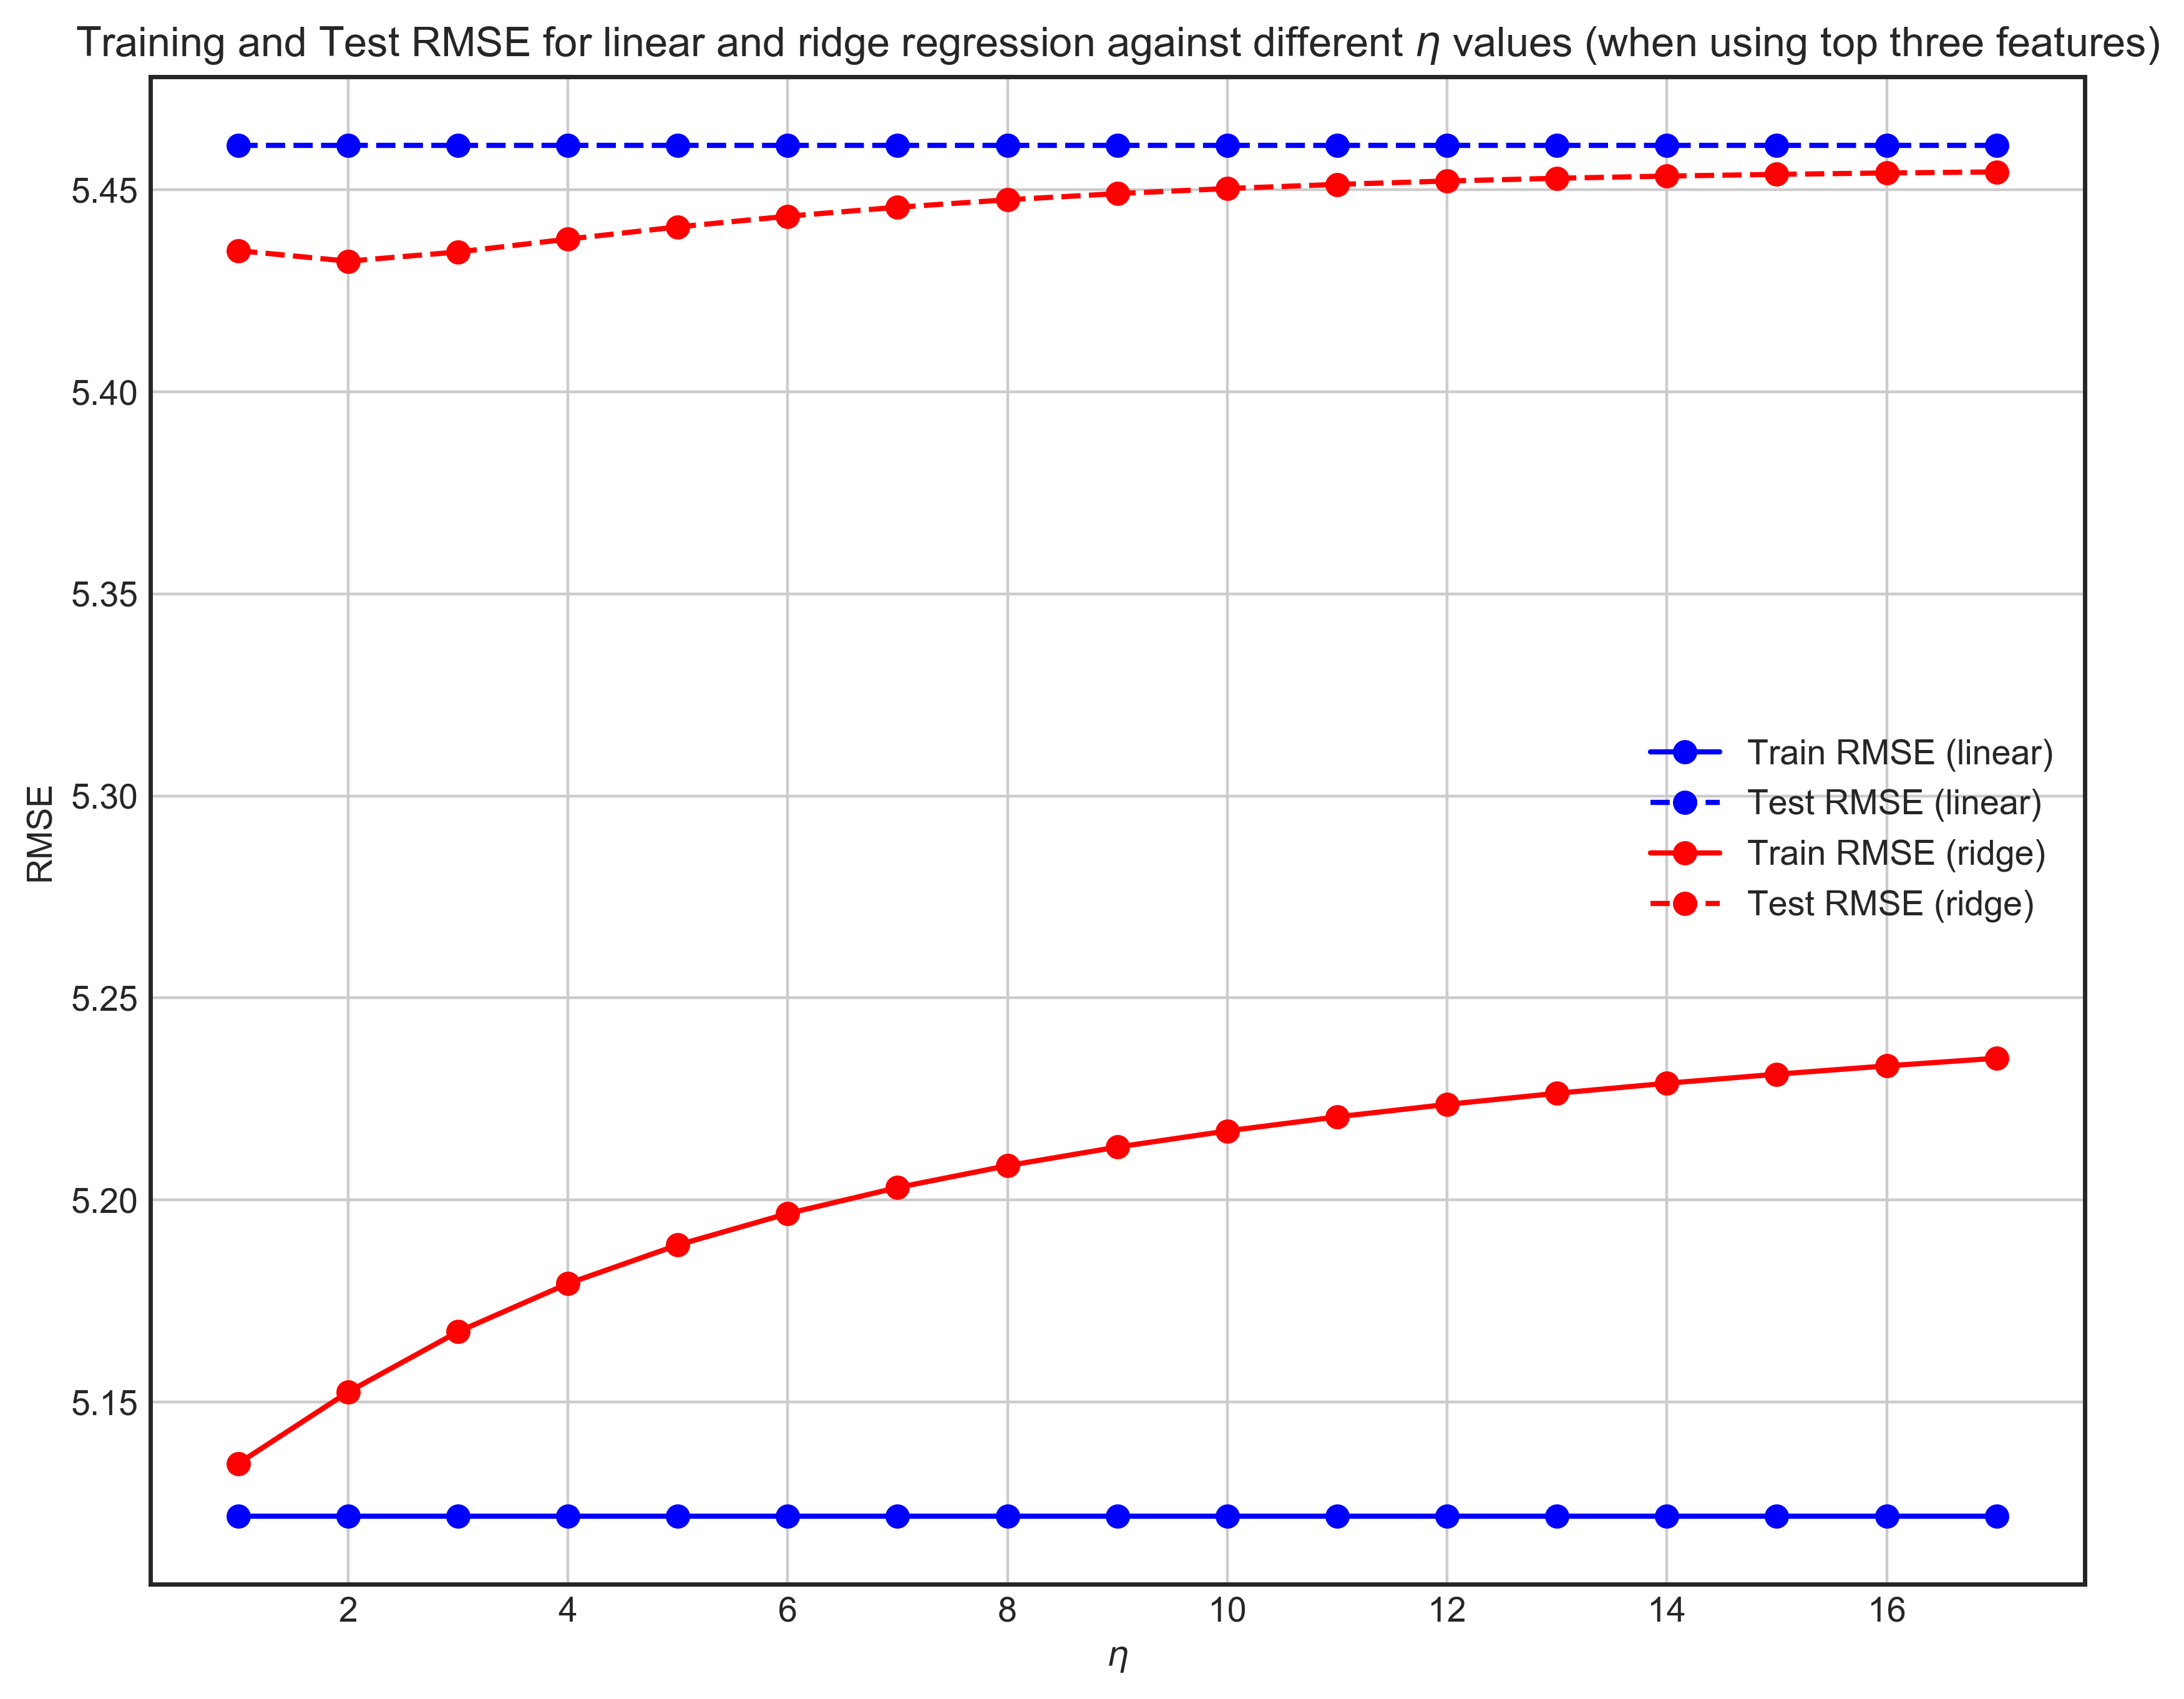

In [324]:
## trying different values of eta on modified feature data (only top-3 features)
etas = [i for i in range(1,18,1)]

rmse_train_linear = []
rmse_test_linear = []
rmse_train_ridge = []
rmse_test_ridge = []

for eta in etas:
    theta = least_square(X_train_mod, y_train)
    theta_r = ridge_reg(X_train_mod, y_train, eta)
    pred_y_train_lin = pred_fn(X_train_mod, theta)
    pred_y_test_lin = pred_fn(X_test_mod, theta)
    rmse_train_linear.append(root_mean_square_error(pred_y_train_lin, y_train))
    rmse_test_linear.append(root_mean_square_error(pred_y_test_lin, y_test))

    pred_y_train_r = pred_fn(X_train_mod, theta_r)
    pred_y_test_r = pred_fn(X_test_mod, theta_r)
    rmse_train_ridge.append(root_mean_square_error(pred_y_train_r, y_train))
    rmse_test_ridge.append(root_mean_square_error(pred_y_test_r, y_test))
    
fig, ax = plt.subplots(figsize=(10, 8), dpi=400)
ax.grid(True)

plt.plot(etas, rmse_train_linear, '-o', c = 'blue', ls = '-', label = 'Train RMSE (linear)')
plt.plot(etas, rmse_test_linear, '-o', c = 'blue', ls = '--', label = 'Test RMSE (linear)')
plt.plot(etas, rmse_train_ridge, '-o', c = 'red', ls = '-', label = 'Train RMSE (ridge)')
plt.plot(etas, rmse_test_ridge, '-o', c = 'red', ls = '--',label = 'Test RMSE (ridge)')

plt.title("Training and Test RMSE for linear and ridge regression against different $\eta$ values (when using top three features)")
plt.legend()
plt.xlabel('$\eta$')
plt.ylabel('RMSE')

In [325]:
# 2.5 linear models of top-3 features with eta = 2.0

# RM > LSTAT > PTRATIO
top_feat_idxs = [5,10,12]
X_train_mod = X_train[:, top_feat_idxs]
X_test_mod = X_test[:, top_feat_idxs]

# linear regression using top-3 features
#TODO
theta = least_square(X_train_mod, y_train)
pred_y_train = pred_fn(X_train_mod, theta)
pred_y_test = pred_fn(X_test_mod, theta)
rmse_train = root_mean_square_error(pred_y_train, y_train)
rmse_test = root_mean_square_error(pred_y_test, y_test)
print ("Linear Regression using top-3 features \n-----------------------------------------------")
print ("Training RMSE = %.4f, Test RMSE = %.4f \n"%(rmse_train, rmse_test))


# ridge regression using top-3 features
#TODO
theta_r = ridge_reg(X_train_mod, y_train, 2.0)
pred_y_train = pred_fn(X_train_mod, theta_r)
pred_y_test = pred_fn(X_test_mod, theta_r)
rmse_train = root_mean_square_error(pred_y_train, y_train)
rmse_test = root_mean_square_error(pred_y_test, y_test)
print ("Ridge Regression using top-3 features (eta=2.0)\n-----------------------------------------------")
print ("Training RMSE = %.4f, Test RMSE = %.4f \n"%(rmse_train, rmse_test))
    

Linear Regression using top-3 features 
-----------------------------------------------
Training RMSE = 5.1218, Test RMSE = 5.4610 

Ridge Regression using top-3 features (eta=2.0)
-----------------------------------------------
Training RMSE = 5.1525, Test RMSE = 5.4324 



### trying feature engineering with L2 regularization (2f)

In [298]:
df_feature_updated = df_feature.copy()

# dropping features which are strongly co-related with DIS
df_feature_updated.drop(['INDUS', 'AGE'], axis=1, inplace=True)


# trying combination of features which are less correlated with each other as well as with MEDV (target variable)
df_feature_updated['NOX/CHAS'] =  df_feature_updated['NOX']/(df_feature_updated['CHAS']+1e-6)
df_feature_updated['B/CHAS'] =  df_feature_updated['B']/(df_feature_updated['CHAS']+1e-6)
df_feature_updated['ZN/CRIM'] =  df_feature_updated['ZN']/(df_feature_updated['CRIM']+1e-6)

# trying transformations (such as square root) of features which are strongly correlated with MEDV
df_feature_updated['RM'] = np.square(df_feature_updated['RM'])
df_feature_updated['LSTAT'] = np.sqrt(df_feature_updated['LSTAT'])
df_feature_updated['PTRATIO'] = np.sqrt(df_feature_updated['PTRATIO'])
df_feature_updated['DIS'] = np.sqrt(df_feature_updated['DIS'])

df_feature_updated.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_feature_updated.to_numpy(), df_target.to_numpy(), test_size=0.3, random_state=8)

## hold out 20% of training data as validation data for hyper-parameter search/ feature selection
X_training, X_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=8)

Text(0, 0.5, 'RMSE')

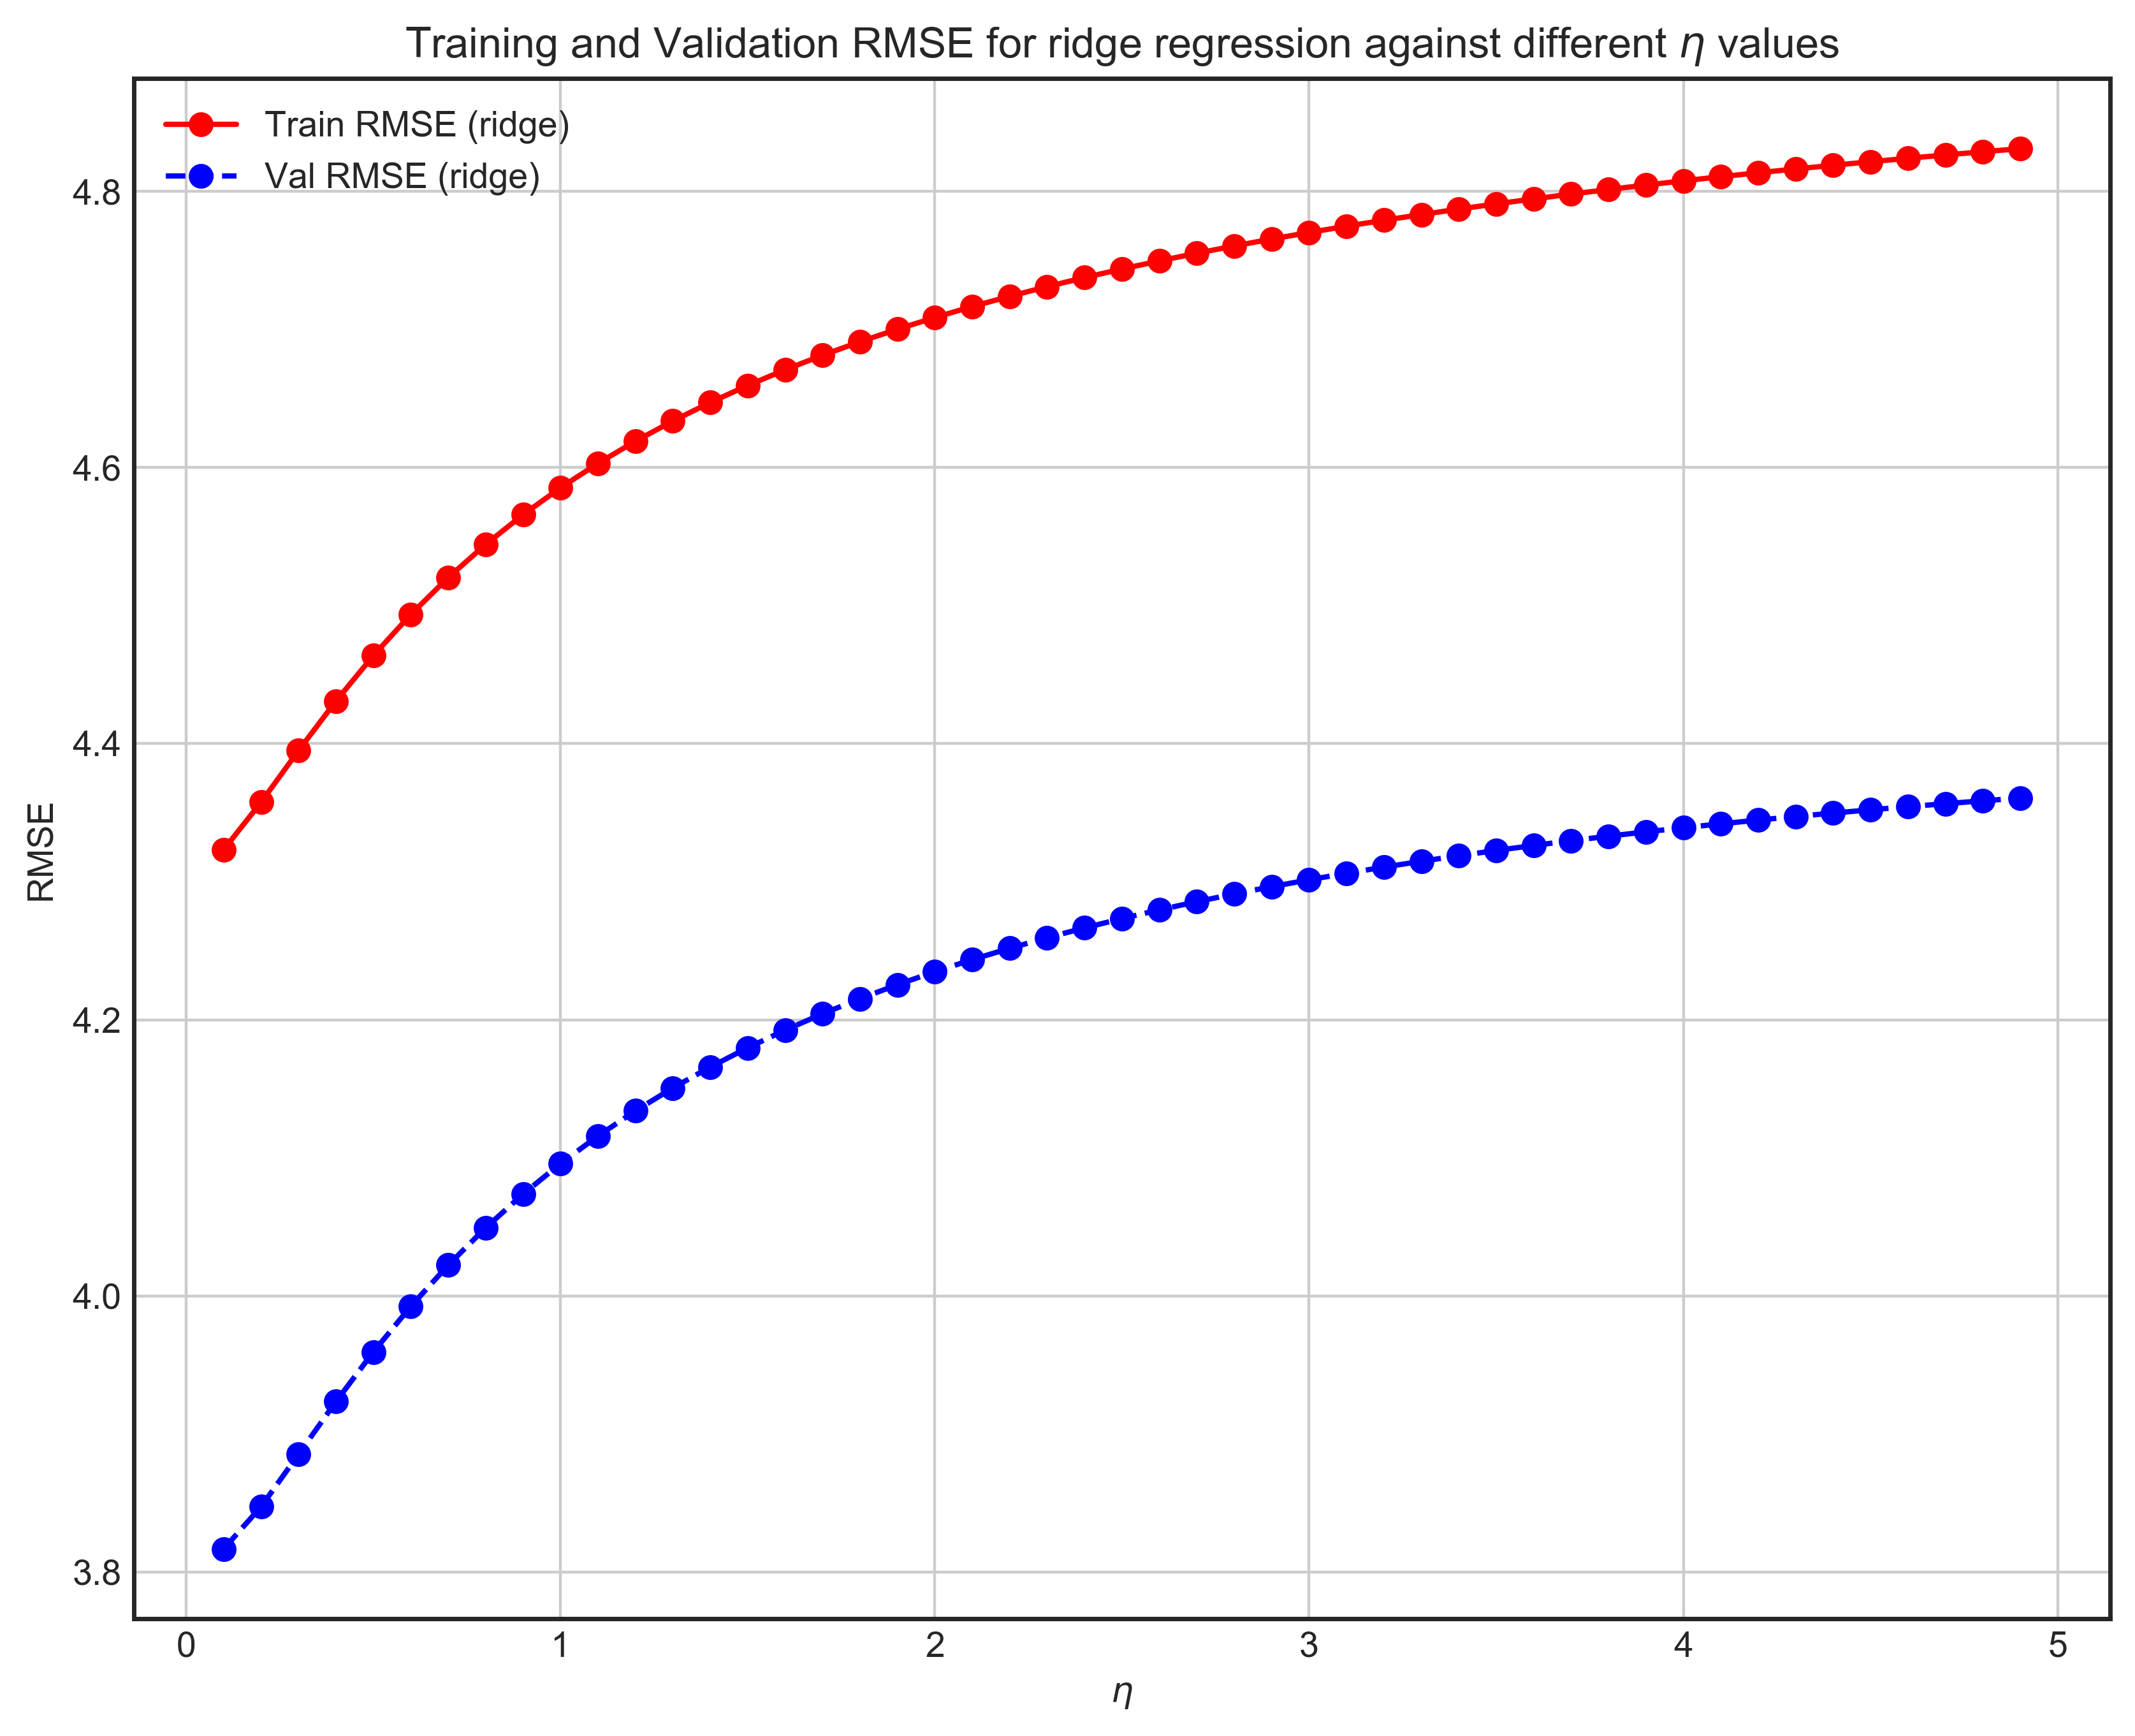

In [299]:
## trying different values of eta and reporting validation and train RMSE
etas = [i for i in np.arange(0.1,5,0.1)]
rmse_train_ridge = []
rmse_val_ridge = []

for eta in etas:
    theta_r = ridge_reg(X_training, y_training, eta)
    pred_y_train_r = pred_fn(X_training, theta_r)
    pred_y_val_r = pred_fn(X_validation, theta_r)
    rmse_train_ridge.append(root_mean_square_error(pred_y_train_r, y_training))
    rmse_val_ridge.append(root_mean_square_error(pred_y_val_r, y_validation))
    
fig, ax = plt.subplots(figsize=(10, 8), dpi=400)

plt.plot(etas, rmse_train_ridge, '-o', c = 'red', ls = '-', label = 'Train RMSE (ridge)')
plt.plot(etas, rmse_val_ridge, '-o', c = 'blue', ls = '--',label = 'Val RMSE (ridge)')

plt.grid()
plt.title("Training and Validation RMSE for ridge regression against different $\eta$ values")
plt.legend()
plt.xlabel('$\eta$')
plt.ylabel('RMSE')

In [302]:
theta_r = ridge_reg(X_training, y_training, 0.1)
pred_y_train_r = pred_fn(X_training, theta_r)
pred_y_val_r = pred_fn(X_validation, theta_r)
pred_y_test_r = pred_fn(X_test, theta_r)
rmse_train_ridge = root_mean_square_error(pred_y_train_r, y_training)
rmse_val_ridge = root_mean_square_error(pred_y_val_r, y_validation)
rmse_test_ridge = root_mean_square_error(pred_y_test_r, y_test)
print ("Test RMSE:", rmse_test_ridge)

Test RMSE: 4.527403337676492
